<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-85/blob/main/Actividad_Semanal_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Nombre de la entrega: Semana 4**
**Equipo 85:**

*   Pablo Alejandro Bravo Vargas - A01793024
*   Antonio Saenz Ramirez - A01793884


Profesor: Jobish Vallikavungal Devassia

Fecha: 10/10/2022


**Parte 0: Selección y limpieza de los Datos en Python**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler  



In [ ]:
filename = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"
df = pd.read_csv(filename)
df.columns = ['ID','Montocredito','Genero','Educacion','EstadoCivil','Edad',
              'Pagos_Sep_2005','Pagos_Ago_2005','Pagos_Jul_2005','Pagos_Jun_2005','Pagos_May_2005','Pagos_Abr_2005',
              'Estado_Sep_2005','Estado_Ago_2005','Estado_Jul_2005','Estado_Jun_2005','Estado_May_2005','Estado_Abr_2005',
              'Monto_Sep_2005','Monto_Ago_2005','Monto_Jul_2005','Monto_Jun_2005','Monto_May_2005','Monto_Abr_2005','Y']
df.head()

,ID,Montocredito,Genero,Educacion,EstadoCivil,Edad,Pagos_Sep_2005,Pagos_Ago_2005,Pagos_Jul_2005,Pagos_Jun_2005,...,Estado_Jun_2005,Estado_May_2005,Estado_Abr_2005,Monto_Sep_2005,Monto_Ago_2005,Monto_Jul_2005,Monto_Jun_2005,Monto_May_2005,Monto_Abr_2005,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [ ]:
#Eliminar los NaN
df['Genero'].fillna(2, inplace = True) 
df.Educacion.replace({5: 4, 6: 4, 0: 4}, inplace=True)
df['Educacion'].fillna(4, inplace = True) 
df.EstadoCivil.replace({0: 3}, inplace=True)
df['EstadoCivil'].fillna(3, inplace = True)
df.Edad.fillna(df.Edad.mean(), inplace=True)
df.dropna(inplace = True) 


# **Parte 1: Ejercicio guiado**

Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

In [ ]:
df = df.drop(['ID','Genero','Educacion','EstadoCivil','Pagos_Sep_2005','Pagos_Ago_2005','Pagos_Jul_2005','Pagos_Jun_2005','Pagos_May_2005','Pagos_Abr_2005','Y'], axis=1)

**Normalización**

In [ ]:
df = pd.DataFrame(StandardScaler().fit_transform(df))
df.columns = ['Montocredito','Edad',
              'Estado_Sep_2005','Estado_Ago_2005','Estado_Jul_2005','Estado_Jun_2005','Estado_May_2005','Estado_Abr_2005',
              'Monto_Sep_2005','Monto_Ago_2005','Monto_Jul_2005','Monto_Jun_2005','Monto_May_2005','Monto_Abr_2005']


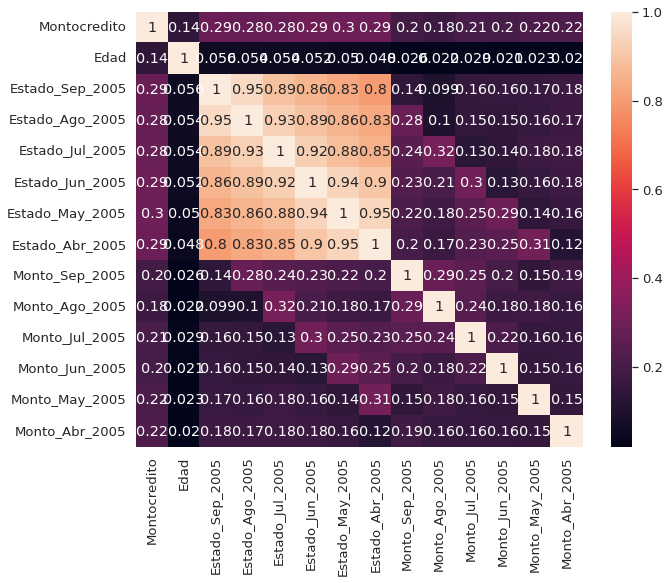

In [ ]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True)

**PCA**

In [ ]:
pcs = PCA()
pcs.fit(df.iloc[::].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Standard deviation,2.432957,1.310005,1.022245,0.961779,0.940055,0.934203,0.882949,0.852433,0.840994,0.514242,0.266499,0.202647,0.159195,0.152459
Proportion of variance,0.422792,0.122575,0.074639,0.066071,0.063120,0.062336,0.055684,0.051901,0.050518,0.018888,0.005073,0.002933,0.001810,0.001660
Cumulative proportion,0.422792,0.545367,0.620006,0.686077,0.749196,0.811533,0.867216,0.919118,0.969635,0.988524,0.993596,0.996530,0.998340,1.000000


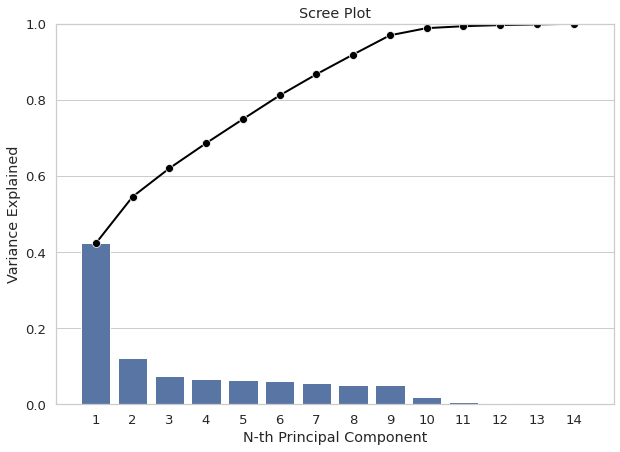

In [ ]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [ ]:
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,2.4330,1.3100,1.0222,0.9618,0.9401,0.9342,0.8829,0.8524,0.8410,0.5142,0.2665,0.2026,0.1592,0.1525
Proportion of variance,0.4228,0.1226,0.0746,0.0661,0.0631,0.0623,0.0557,0.0519,0.0505,0.0189,0.0051,0.0029,0.0018,0.0017
Cumulative proportion,0.4228,0.5454,0.6200,0.6861,0.7492,0.8115,0.8672,0.9191,0.9696,0.9885,0.9936,0.9965,0.9983,1.0000


# **Paso 2: Interprete cada componente principal en términos de las variables**

In [ ]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = df.iloc[::].columns
                                )
modelo= pcsComponents_df.iloc[:,:7]
modelo


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Montocredito,0.165522,0.300782,-0.378350,-0.200527,0.034696,-0.078372,0.111243
Edad,0.032787,0.071858,-0.869702,0.338702,-0.039097,0.070979,-0.078796
Estado_Sep_2005,0.372426,-0.190870,-0.034183,-0.064039,0.041161,-0.044041,0.008174
Estado_Ago_2005,0.383243,-0.174657,-0.001853,0.007370,0.083063,-0.028996,-0.032340
Estado_Jul_2005,0.388256,-0.126913,0.034706,0.060509,0.114167,0.098819,-0.121294
Estado_Jun_2005,0.391550,-0.120406,0.034038,0.074801,0.028588,0.014358,0.126436
Estado_May_2005,0.388498,-0.105950,0.033869,0.039638,-0.106943,-0.099053,-0.007607
Estado_Abr_2005,0.380660,-0.094216,0.018531,-0.070255,-0.164916,0.069785,0.007955
Monto_Sep_2005,0.135164,0.383274,0.173490,0.361363,0.226137,0.039815,-0.201097
Monto_Ago_2005,0.116790,0.408294,0.200803,0.346457,0.150515,0.407194,-0.279520


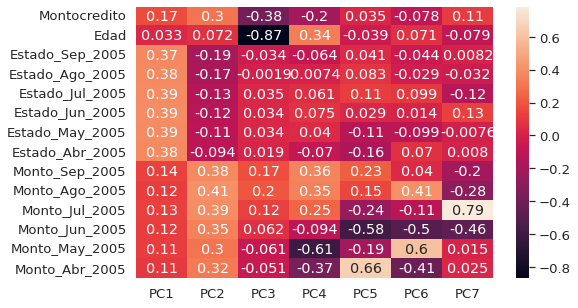

In [ ]:
fig = plt.figure(figsize=(8,5))
sns.heatmap(modelo, annot = True)

In [ ]:
x = pcsComponents_df.index
x = x.to_list()
x

['Montocredito',
 'Edad',
 'Estado_Sep_2005',
 'Estado_Ago_2005',
 'Estado_Jul_2005',
 'Estado_Jun_2005',
 'Estado_May_2005',
 'Estado_Abr_2005',
 'Monto_Sep_2005',
 'Monto_Ago_2005',
 'Monto_Jul_2005',
 'Monto_Jun_2005',
 'Monto_May_2005',
 'Monto_Abr_2005']

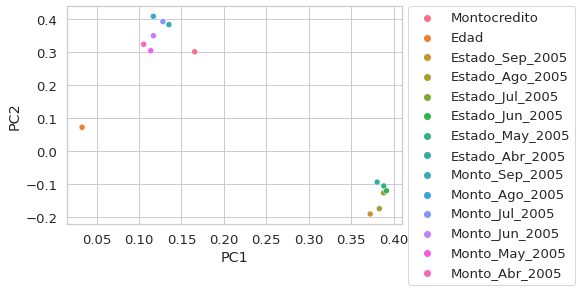

In [ ]:
sns.scatterplot(data=pcsComponents_df, x="PC1", y="PC2", hue=pcsComponents_df.index)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdc86740e50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdc866c4910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdc867408d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fdc866cb3d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdc866cb8d0>,
 'means': []}

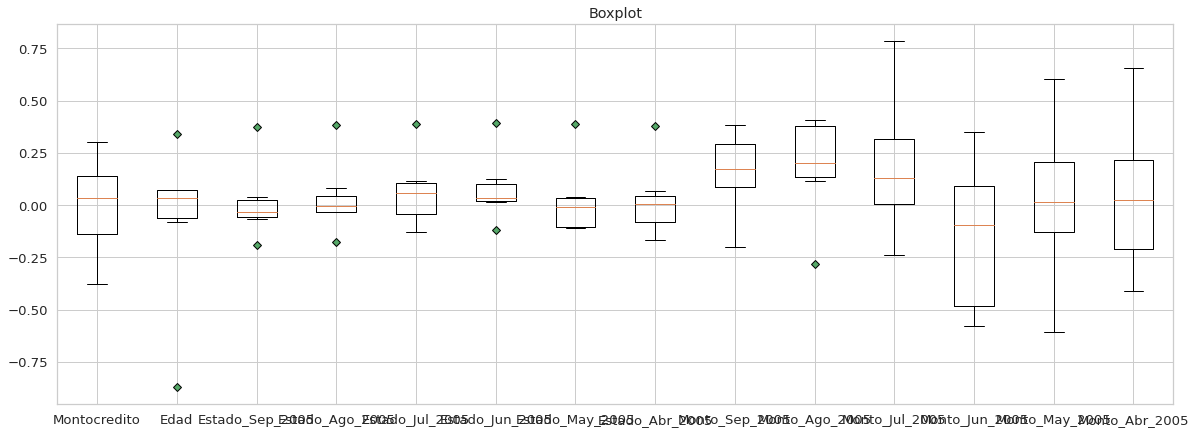

In [ ]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots(figsize=(20, 7))
ax.set_title('Boxplot')
ax.boxplot(modelo, flierprops=green_diamond, labels = x)

In [ ]:
print('PC1')
print(pcsComponents_df.PC1.abs().idxmin())
print(pcsComponents_df.PC1.abs().idxmax())
print('PC2')
print(pcsComponents_df.PC2.abs().idxmin())
print(pcsComponents_df.PC2.abs().idxmax())
print('PC3')
print(pcsComponents_df.PC3.abs().idxmin())
print(pcsComponents_df.PC3.abs().idxmax())
print('PC4')
print(pcsComponents_df.PC4.abs().idxmin())
print(pcsComponents_df.PC4.abs().idxmax())
print('PC5')
print(pcsComponents_df.PC5.abs().idxmin())
print(pcsComponents_df.PC5.abs().idxmax())
print('PC6')
print(pcsComponents_df.PC6.abs().idxmin())
print(pcsComponents_df.PC6.abs().idxmax())
print('PC7')
print(pcsComponents_df.PC7.abs().idxmin())
print(pcsComponents_df.PC7.abs().idxmax())

PC1
Edad
Estado_Jun_2005
PC2
Edad
Monto_Ago_2005
PC3
Estado_Ago_2005
Edad
PC4
Estado_Ago_2005
Monto_May_2005
PC5
Estado_Jun_2005
Monto_Abr_2005
PC6
Estado_Jun_2005
Monto_May_2005
PC7
Estado_May_2005
Monto_Jul_2005



**Preguntas**

**¿Cuál es el número de componentes mínimo y por qué?**

> El mínimo de componentes puede estar entre el 80% y 90% de la varianza acumulada, para nuestro ejercicio decidimos considerar que el mínimo son 7 que representa el 87% de la varianza acumulada

**¿Cuál es la variación de los datos que representan esos componentes?**

**¿Cuál es la pérdida de información después de realizar PCA?**

**De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**


**¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**

> Cuando queremos entender la relación que existe un conjunto de datos con múltiples variables. Lo que buscamos es disminuir el número de variables que representen el mayor volumen del total de los datos para poder visulaizar y entender la relación e importancia de cada una de ellas.


